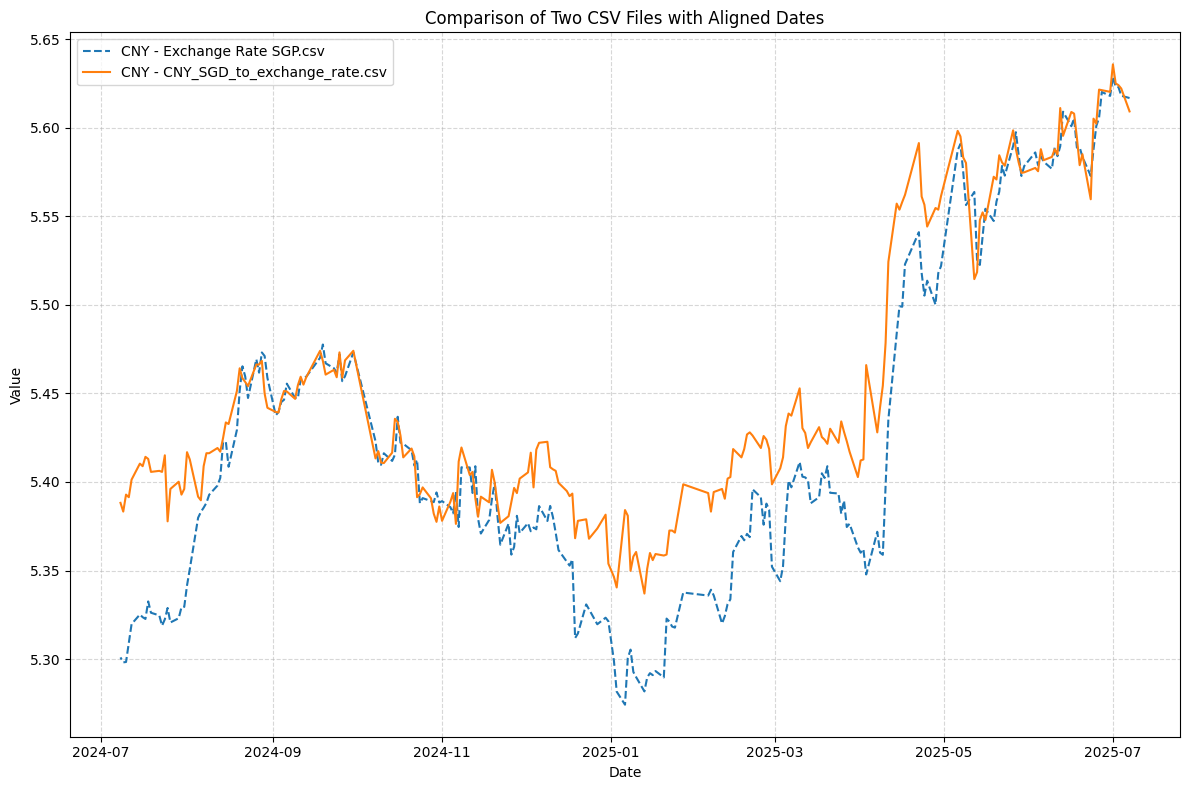

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_csv_and_plot_with_aligned_dates(file1: str, file2: str):
    # 读取两个CSV文件到DataFrame
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    # 确保日期列的格式一致，转换为 datetime 类型
    df1['Date'] = pd.to_datetime(df1['Date'])
    df2['Date'] = pd.to_datetime(df2['Date'])
    
    # 将日期列设置为索引
    df1.set_index('Date', inplace=True)
    df2.set_index('Date', inplace=True)
    
    # 对齐两个DataFrame的日期索引
    aligned_df = df1.join(df2, lsuffix='_file1', rsuffix='_file2', how='inner')
    
    # 检查是否有重名列
    if df1.columns.tolist() != df2.columns.tolist():
        print("警告：两个文件的列不一致！")
        return
    
    # 计算差异（仅对数值列）
    difference = aligned_df.filter(like='_file1') - aligned_df.filter(like='_file2')
    
    # 过滤出差异不为零的值
    diff_data = difference[difference != 0]

    # 绘制两个CSV文件的曲线图以及差异
    plt.figure(figsize=(12, 8))
    
    # 绘制第一个CSV文件的数据曲线
    for column in df1.columns:
        if not aligned_df[column + '_file1'].isnull().all():  # 忽略全为 NaN 的列
            plt.plot(aligned_df.index, aligned_df[column + '_file1'], label=f"{column} - {file1}", linestyle='--')
    
    # 绘制第二个CSV文件的数据曲线
    for column in df2.columns:
        if not aligned_df[column + '_file2'].isnull().all():  # 忽略全为 NaN 的列
            plt.plot(aligned_df.index, aligned_df[column + '_file2'], label=f"{column} - {file2}", linestyle='-')
    
    # 绘制差异数据
    for column in diff_data.columns:
        if not diff_data[column].isnull().all():  # 忽略全为 NaN 的列
            plt.plot(diff_data.index, diff_data[column], label=f"Difference - {column}", linestyle=':')

    plt.title('Comparison of Two CSV Files with Aligned Dates')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(loc='best')
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    
    # 显示图形
    plt.show()

if __name__ == "__main__":
    file1 = "Exchange Rate SGP.csv"  # 第一个CSV文件的路径
    file2 = "CNY_SGD_to_exchange_rate.csv"  # 第二个CSV文件的路径
    compare_csv_and_plot_with_aligned_dates(file1, file2)
